# Importação dos dados



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tic

In [ ]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## Ajustes

In [ ]:
# Só pra facilitar vou colocar os títulos em minúsculo
loja1.columns = loja1.columns.str.lower()
loja2.columns = loja2.columns.str.lower()
loja3.columns = loja3.columns.str.lower()
loja4.columns = loja4.columns.str.lower()
loja1.head()

,produto,categoria do produto,preço,frete,data da compra,vendedor,local da compra,avaliação da compra,tipo de pagamento,quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,1


In [ ]:
loja1['loja'] = 1
loja2['loja'] = 2
loja3['loja'] = 3
loja4['loja'] = 4

# Concatenando os dataframes
lojas = pd.concat([loja1, loja2, loja3, loja4])

# Criando a coluna 'ref' ano-mes
lojas['data da compra'] = pd.to_datetime(lojas['data da compra'],yearfirst=True,dayfirst=True)
lojas['ref'] = lojas['data da compra'].dt.strftime('%Y-%m')

# Exibindo as primeiras linhas do dataframe com a nova coluna
lojas.head()

,produto,categoria do produto,preço,frete,data da compra,vendedor,local da compra,avaliação da compra,tipo de pagamento,quantidade de parcelas,lat,lon,loja,ref
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,1,2021-01
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,1,2022-05
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,1,2021-03
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,1,2022-05
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,1,2020-11


#1. Análise do faturamento


In [ ]:
faturamento_mes = lojas.groupby(['loja','ref']).agg(faturamento=('preço','sum'))
faturamento_mes.reset_index(inplace=True)
print('FATURAMENTO TOTAL POR LOJA\n')
faturamento_mes.groupby('loja')['faturamento'].sum().to_frame().style.format({'faturamento': '${:,.2f}'})

FATURAMENTO TOTAL POR LOJA



,faturamento
loja,
1,"$1,534,509.12"
2,"$1,488,459.06"
3,"$1,464,025.03"
4,"$1,384,497.58"


## Faturamento mensal

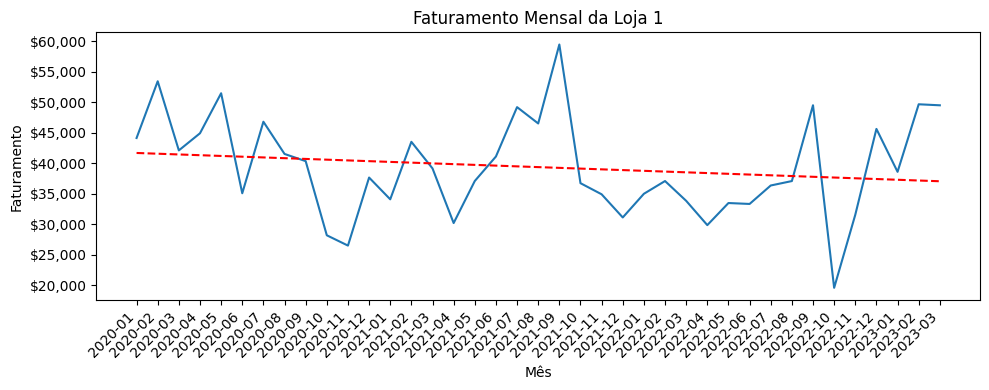

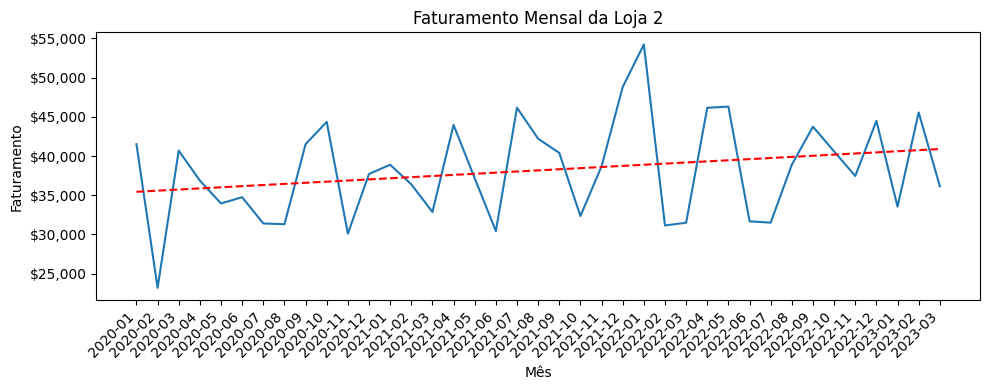

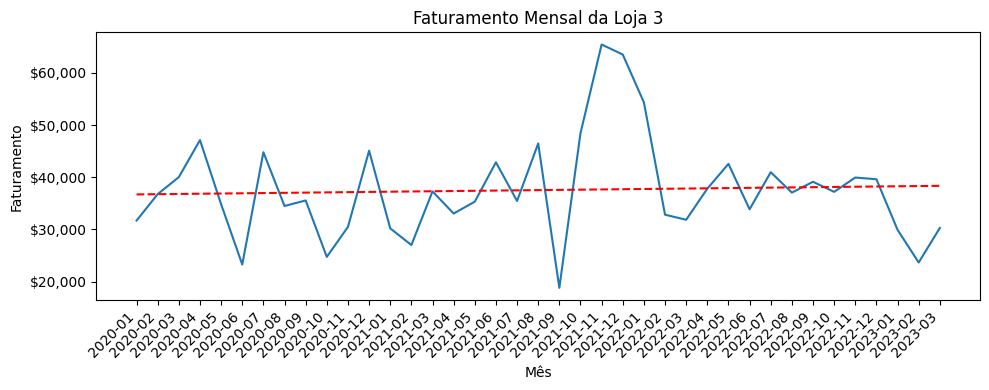

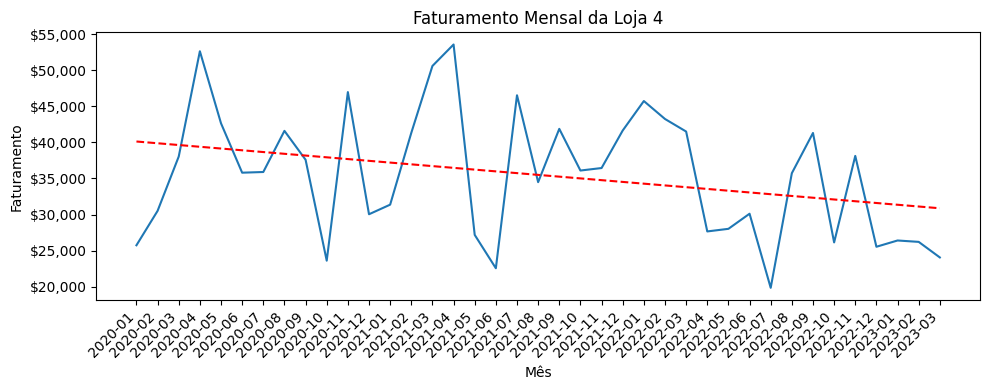

In [ ]:
for loja in range(1,5):
  # Preparação
  temp_df = faturamento_mes.loc[faturamento_mes['loja'] == loja].copy()
  temp_df['ref_numeric'] = range(len(temp_df['ref']))

  # Linha de tendência
  fit = np.polyfit(temp_df['ref_numeric'], temp_df['faturamento'], 1)
  trend = np.poly1d(fit)

  # Gráficos
  fig, ax = plt.subplots()
  fig.set_size_inches(10, 4)
  ax.plot(temp_df['ref'], temp_df['faturamento'])
  ax.plot(temp_df['ref'], trend(temp_df['ref_numeric']), "r--", label="Trendline")

  # Perfumaria
  formatter = tic.StrMethodFormatter('${x:,.0f}')
  ax.yaxis.set_major_formatter(formatter)
  plt.xlabel('Mês')
  plt.ylabel('Faturamento')
  plt.title(f'Faturamento Mensal da Loja {loja}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()

  # Encerramento
  plt.show()
  print('\n')
  del temp_df

# 2. Vendas por Categoria


FATURAMENTO TOTAL POR CATEGORIA



,vendas
categoria do produto,
brinquedos,"$98,140.86"
eletrodomesticos,"$1,766,337.03"
eletronicos,"$2,214,099.72"
esporte e lazer,"$190,635.39"
instrumentos musicais,"$465,029.67"
livros,"$50,260.74"
moveis,"$1,010,214.00"
utilidades domesticas,"$76,773.38"


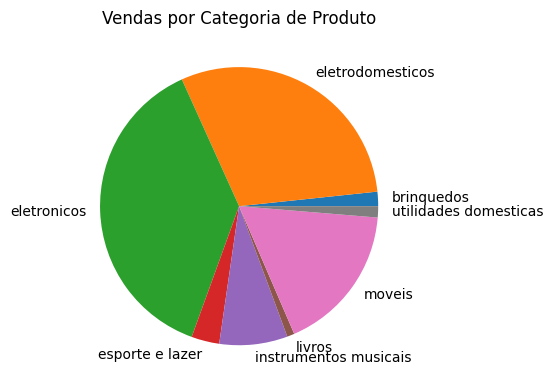

In [ ]:
faturamento_categ = lojas.groupby(['loja','categoria do produto']).agg(vendas=('preço','sum'))
faturamento_categ.reset_index(inplace=True)
print('FATURAMENTO TOTAL POR CATEGORIA\n')
faturamento_categ_total = faturamento_categ.groupby('categoria do produto')['vendas'].sum().to_frame()
display(faturamento_categ_total.style.format({'vendas': '${:,.2f}'}))

# Gráfico
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
formatter = tic.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
ax.pie(faturamento_categ_total['vendas'], labels=faturamento_categ_total.index)
plt.title(f'Vendas por Categoria de Produto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print('\n')

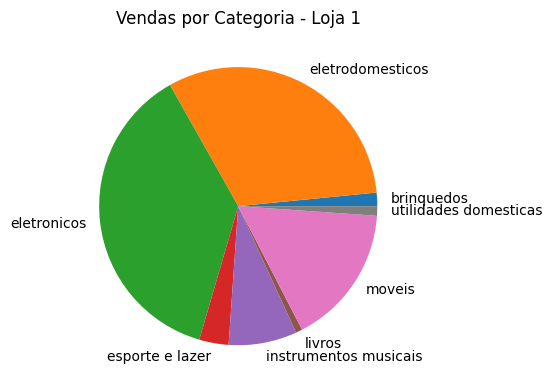

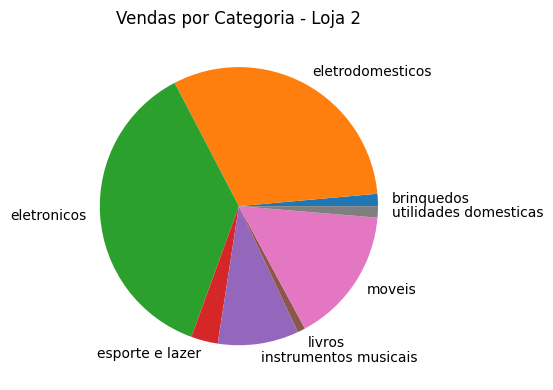

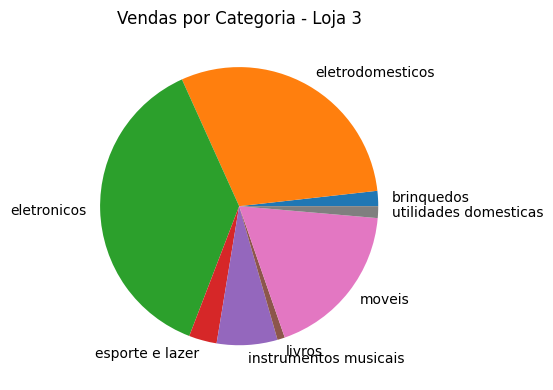

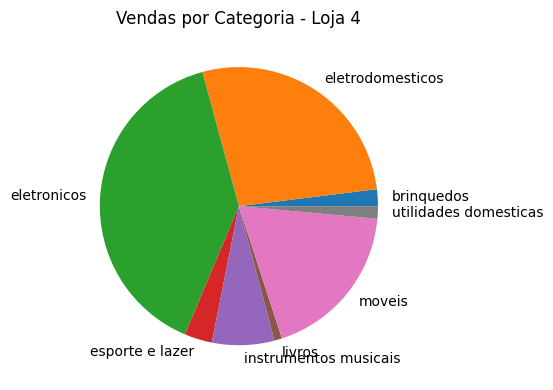

In [ ]:
# Plot do gráfico de barras
for loja in range(1,5):
  temp_df = faturamento_categ[faturamento_categ['loja'] == loja]
  fig, ax = plt.subplots()
  fig.set_size_inches(10, 4)
  formatter = tic.StrMethodFormatter('${x:,.0f}')
  ax.yaxis.set_major_formatter(formatter)
  ax.pie(temp_df['vendas'], labels=temp_df['categoria do produto'])
  plt.title(f'Vendas por Categoria - Loja {loja}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
  print('\n')
  del temp_df

# 3. Média de Avaliação das Lojas

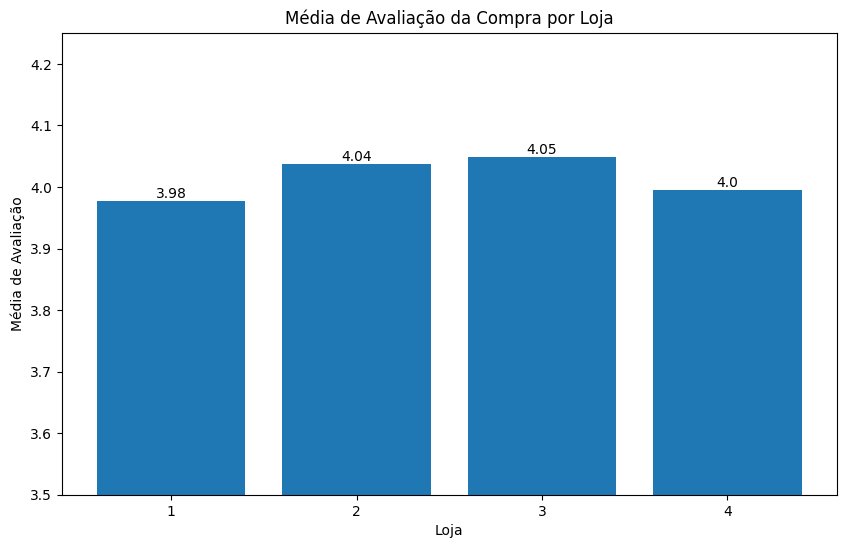

In [ ]:
avaliacao_media = lojas.groupby('loja')['avaliação da compra'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(avaliacao_media.index, avaliacao_media.values)
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação da Compra por Loja')
plt.xticks(avaliacao_media.index)

plt.ylim(bottom=3.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# N
quantidade = 10

# Agrupa por produto e soma a quantidade
produtos_vendidos = lojas.groupby('produto').agg(vendas=('produto','count'))
produtos_vendidos = produtos_vendidos.sort_values(by='vendas', ascending=False)
produtos_vendidos.reset_index(inplace=True)

# Exibe os N primeiros produtos mais vendidos
print(f"{quantidade} Produtos mais vendidos:")
display(produtos_vendidos.head(quantidade))

# Exibe os N últimos produtos menos vendidos
print(f"\n{quantidade} Produtos menos vendidos:")
display(produtos_vendidos.tail(quantidade))

10 Produtos mais vendidos:


,produto,vendas
0,Cômoda,210
1,Carrinho controle remoto,206
2,Micro-ondas,206
3,Bateria,203
4,Cama king,201
5,Jogo de panelas,200
6,Modelagem preditiva,200
7,Secadora de roupas,200
8,Blocos de montar,199
9,Cama box,199



10 Produtos menos vendidos:


,produto,vendas
41,Smartwatch,172
42,Panela de pressão,172
43,Jogo de copos,169
44,Poltrona,168
45,Assistente virtual,167
46,Ciência de dados com python,166
47,Guitarra,165
48,Mochila,163
49,Headset,158
50,Celular ABXY,157


## Por loja

In [ ]:
# N
quantidade = 3

# Agrupa por produto e soma a quantidade
produtos_vendidos = lojas.groupby(['loja','produto']).agg(vendas=('produto','count'))
produtos_vendidos = produtos_vendidos.sort_values(by='vendas', ascending=False)
produtos_vendidos.reset_index(inplace=True)

for loja in range(1,5):
  temp_df = produtos_vendidos[produtos_vendidos['loja'] == loja]

  # Exibe os N primeiros produtos mais vendidos
  print(f"{quantidade} Produtos mais vendidos na loja {loja}:")
  display(temp_df.head(quantidade))

  # Exibe os N últimos produtos menos vendidos
  print(f"\n{quantidade} Produtos menos vendidos na loja {loja}:")
  display(produtos_vendidos.tail(quantidade))
  print('\n-----------------------------------------')
  del temp_df

3 Produtos mais vendidos na loja 1:


,loja,produto,vendas
4,1,Guarda roupas,60
5,1,Micro-ondas,60
6,1,TV Led UHD 4K,60



3 Produtos menos vendidos na loja 1:


,loja,produto,vendas
201,1,Celular ABXY,33
202,4,Guitarra,33
203,2,Jogo de tabuleiro,32



-----------------------------------------
3 Produtos mais vendidos na loja 2:


,loja,produto,vendas
0,2,Iniciando em programação,65
1,2,Micro-ondas,62
3,2,Bateria,61



3 Produtos menos vendidos na loja 2:


,loja,produto,vendas
201,1,Celular ABXY,33
202,4,Guitarra,33
203,2,Jogo de tabuleiro,32



-----------------------------------------
3 Produtos mais vendidos na loja 3:


,loja,produto,vendas
12,3,Kit banquetas,57
16,3,Mesa de jantar,56
17,3,Cama king,56



3 Produtos menos vendidos na loja 3:


,loja,produto,vendas
201,1,Celular ABXY,33
202,4,Guitarra,33
203,2,Jogo de tabuleiro,32



-----------------------------------------
3 Produtos mais vendidos na loja 4:


,loja,produto,vendas
2,4,Cama box,62
7,4,Faqueiro,59
15,4,Cama king,56



3 Produtos menos vendidos na loja 4:


,loja,produto,vendas
201,1,Celular ABXY,33
202,4,Guitarra,33
203,2,Jogo de tabuleiro,32



-----------------------------------------


# 5. Frete Médio por Loja


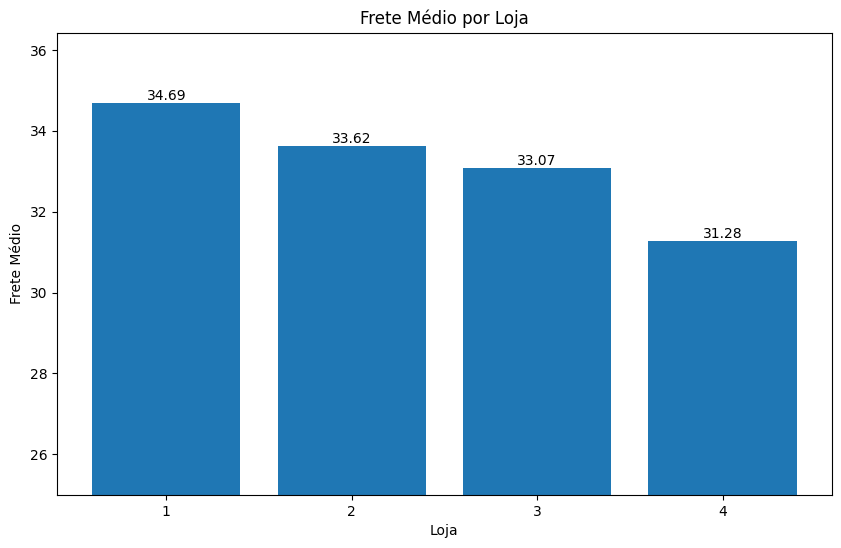

In [ ]:
frete_medio = lojas.groupby('loja')['frete'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(frete_medio.index, frete_medio.values)
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.title('Frete Médio por Loja')
plt.xticks(frete_medio.index)

plt.ylim(bottom=25)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# 6. Relatório

A loja com menor faturamento e sem perspectiva de melhora é a loja 4. Além disso, ela não possui um desempenho diferenciado em nenhuma das outras métricas avaliadas.